### Created on Fri Jun 14th 2020

### @author: Maximilian Forstenhaeusler

# Viscoelastic Fitting - Example 

### Description 
This is an example of how the library viscoelasticity can be implimeted to fit a viscoelastic model to simulated AFM data that can be easily exchanged with experimental data. 

#### Call Libraries 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from viscoelasticity import NLS_fit, conv, log_scale
from joblib import dump, load
from lmfit import Parameters, minimize, report_fit

### 1. Load Data 

In [2]:
data = load('FD_AFM_data_1.pkl')  # loads data file form device 
df = pd.DataFrame.from_dict(data)  # creates a dataframe from leaded dictionary file 
df  # displays data as table 

,Time [sec],Tip [m],Fts [N],Base [m
0,0.000000e+00,-6.283185e-22,5.940868e-26,0.000000e+00
1,1.000000e-08,-1.296113e-21,1.756742e-25,-1.000000e-16
2,2.000000e-08,-2.042860e-21,3.469475e-25,-2.000000e-16
3,3.000000e-08,-2.908037e-21,5.882165e-25,-3.000000e-16
4,4.000000e-08,-3.931122e-21,9.230547e-25,-4.000000e-16
...,...,...,...,...
99999995,9.999999e-01,-6.162311e-10,9.383768e-10,-1.000000e-08
99999996,1.000000e+00,-6.162311e-10,9.383769e-10,-1.000000e-08
99999997,1.000000e+00,-6.162311e-10,9.383769e-10,-1.000000e-08
99999998,1.000000e+00,-6.162311e-10,9.383769e-10,-1.000000e-08


### 2. Create arrays from data file / dataframe 
Note: scaling the arrays is advised to reduce calulation time

In [3]:
time = data[df.keys()[0]]
tip = data[df.keys()[1]]
Fts = data[df.keys()[2]]
base = data[df.keys()[3]]

In [4]:
# scaling arrays from 100 Mio datapoints to 1000
t_sc = time[::100000]
tip_sc = -tip[::100000]
Fts_sc = Fts[::100000]
base_sc = base[::100000]

__________________________________________________________________________________________________________________
### Input parameteres
#### Cantilever, tip and viscoelastic parameters

In [25]:
Jg = 2e-10  # classy compliance
J = [5e-9, 7e-9, 2e-10]  # compliance 
tau = [8e-5, 3e-4, 1e-3] # characteristic time 
J_5 = np.array([5e-9, 7e-9, 2e-10, 1e-9, 5e-8])  # compliance (5 Arm)
tau_5 = np.array([8e-5, 3e-4, 1e-3, 2e-2, 1e-1])  # characteristic time (5 Arm)
arms = 3  # number of arms 
R = 20e-9  # radius tip
nu = 0.5  # poissons ratio of material
alfa = 8.0 / 3 * np.sqrt(R) / (1 - nu)  # constant that converts stress/strain 
                                        # to force/deformation accounting for tip geomery
t_res, t_exp = 1e-5, 1.0

__________________________________________________________________________________________________________________
### 3. Fitting
#### 3 Arm Gen. Kelvin-Voigt Fit

In [26]:
Jg_fit_log, J_fit_log, tau_fit_log = NLS_fit(0, Jg, J, tau, arms, t_sc, tip_sc, Fts_sc, alfa, t_res, t_exp)
Jg_fit_time, J_fit_time, tau_fit_time = NLS_fit(1, Jg, J, tau, arms, t_sc, tip_sc, Fts_sc, alfa, t_res, t_exp)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 104
    # data points      = 45
    # variables        = 7
    chi-square         = 0.14885107
    reduced chi-square = 0.00391713
    Akaike info crit   = -243.016217
    Bayesian info crit = -230.369580
##  Warning: uncertainties could not be estimated:
    Jg:    at initial value
    Jg:    at boundary
    J1:    at initial value
    J1:    at boundary
    J2:    at initial value
    J2:    at boundary
    J3:    at initial value
    J3:    at boundary
[[Variables]]
    Jg:    2.0000e-10 (init = 2e-10)
    J1:    5.0000e-09 (init = 5e-09)
    tau1:  6.8381e-06 (init = 8e-05)
    J2:    5.3871e-09 (init = 7e-09)
    tau2:  2.8540e-04 (init = 0.0003)
    J3:    2.0000e-10 (init = 2e-10)
    tau3:  8.8715e-07 (init = 0.001)
None
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 345
    # data points      = 1000
    # variables        = 7
    chi-square         = 30.4122001
    reduce

#### 3 Arm Gen. Kelvin-Voigt Fit

In [27]:
arms = 5

Jg_fit_log_5, J_fit_log_5, tau_fit_log_5 = NLS_fit(0, Jg, J_5, tau_5, arms, t_sc, tip_sc, Fts_sc, alfa, 1e-4, 1.0)
Jg_fit_time_5, J_fit_time_5, tau_fit_time_5 = NLS_fit(0, Jg, J_5, tau_5, arms, t_sc, tip_sc, Fts_sc, alfa, 1e-4, 1.0)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 480
    # data points      = 36
    # variables        = 11
    chi-square         = 0.08941794
    reduced chi-square = 0.00357672
    Akaike info crit   = -193.926304
    Bayesian info crit = -176.507596
##  Warning: uncertainties could not be estimated:
    Jg:    at initial value
    Jg:    at boundary
    J1:    at initial value
    J1:    at boundary
    J2:    at initial value
    J2:    at boundary
    J3:    at initial value
    J3:    at boundary
    J4:    at initial value
    J4:    at boundary
    J5:    at boundary
[[Variables]]
    Jg:    2.0000e-10 (init = 2e-10)
    J1:    5.0000e-09 (init = 5e-09)
    tau1:  0.96991401 (init = 8e-05)
    J2:    4.6938e-09 (init = 7e-09)
    tau2:  2.6583e-04 (init = 0.0003)
    J3:    2.0000e-10 (init = 2e-10)
    tau3:  0.97496466 (init = 0.001)
    J4:    1.0000e-09 (init = 1e-09)
    tau4:  0.96480391 (init = 0.02)
    J5:    1.9261e-09 (init = 5e-08)
    

__________________________________________________________________________________________________________________
### 4. Results
Calculate LHS from data and use conv function form viscoelasticity to calculate RHS with fitted viscoleastic parameters 
##### Calculate LHS and weigh in logarithmic scale 

In [28]:
tip_norm = alfa*tip_sc**1.5
tip_log, t_log = log_scale(tip_norm, t_sc, t_res, t_exp)

##### Calculate RHS and weigh in logarithmic scale 

In [29]:
F_log, _ = log_scale(Fts_sc, t_sc, t_res, t_exp)

con = conv('Gen. Kelvin-Voigt', t_log, F_log, Jg_fit_log, J_fit_log, tau_fit_log)
con_time = conv('Gen. Kelvin-Voigt', t_sc, Fts_sc, Jg_fit_time, J_fit_time, tau_fit_time)

con_5 = conv('Gen. Kelvin-Voigt', t_log, F_log, Jg_fit_log_5, J_fit_log_5, tau_fit_log_5)
con_5_time = conv('Gen. Kelvin-Voigt', t_sc, Fts_sc, Jg_fit_log_5, J_fit_log_5, tau_fit_log_5)

__________________________________________________________________________________________________________________
### 5. Graphs 

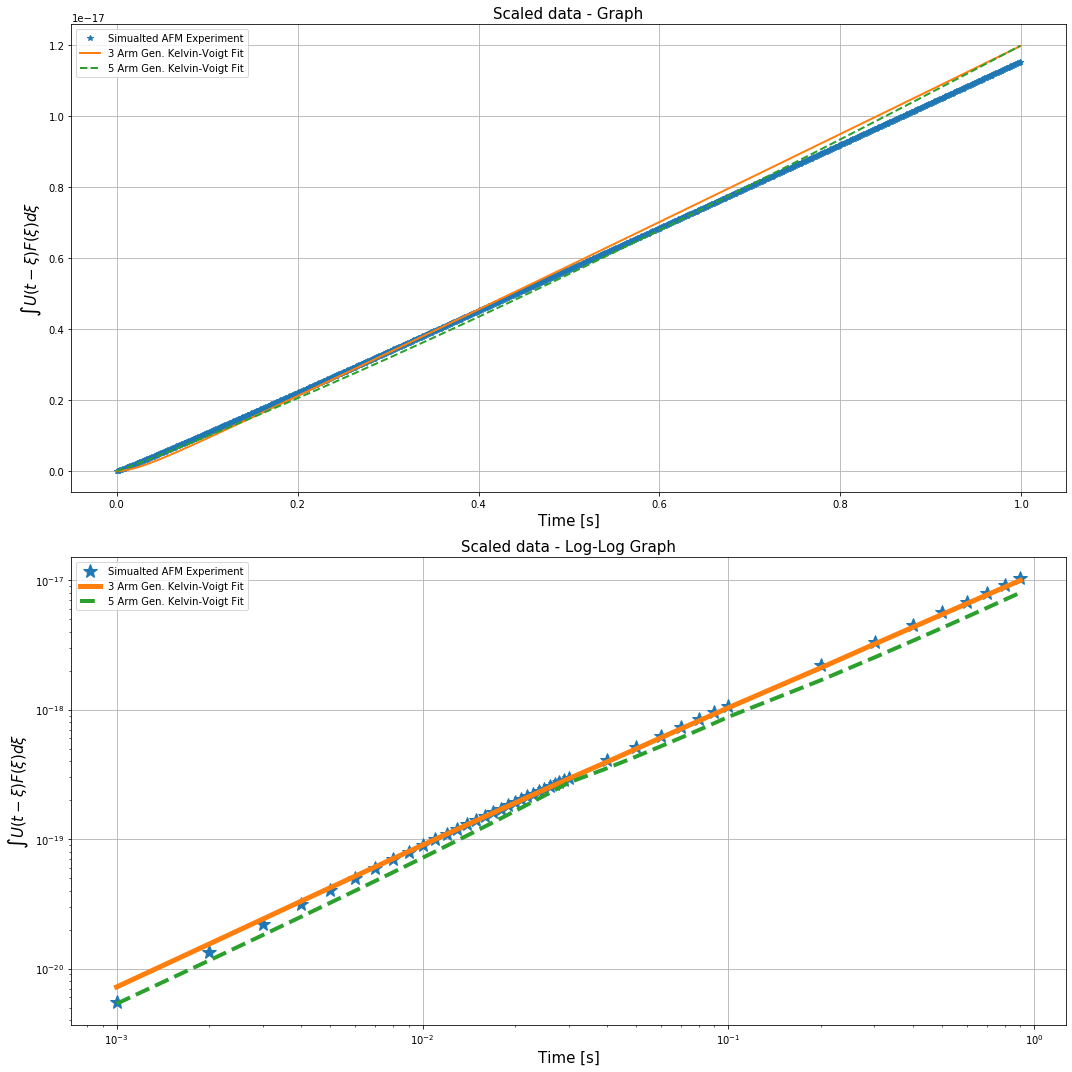

In [30]:
fig, ax = plt.subplots(2,1, figsize=(15, 15), tight_layout=True)

ax[0].set_title('Scaled data - Graph', fontsize=15)
ax[0].plot(t_sc, tip_norm,'*', lw=1,label='Simualted AFM Experiment')
ax[0].plot(t_sc, con_time,'-', lw=2, label='3 Arm Gen. Kelvin-Voigt Fit')
ax[0].plot(t_sc, con_5_time*0.6, '--', lw=2, label='5 Arm Gen. Kelvin-Voigt Fit')
ax[0].set_ylabel(r'$ \int U(t-\xi) F(\xi) d\xi$', fontsize=15)
ax[0].set_xlabel('Time [s]', fontsize=15)
ax[0].legend()
ax[0].grid()

ax[1].set_title('Scaled data - Log-Log Graph', fontsize=15)
ax[1].plot(t_log, tip_log,'*', markersize=15, label='Simualted AFM Experiment')
ax[1].plot(t_log, con,'-', lw=5, label='3 Arm Gen. Kelvin-Voigt Fit')
ax[1].plot(t_log, con_5,'--', lw=4, label='5 Arm Gen. Kelvin-Voigt Fit')
ax[1].set_ylabel(r'$ \int U(t-\xi) F(\xi) d\xi$', fontsize=15)
ax[1].set_xlabel('Time [s]', fontsize=15)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].grid()